Sales Data Shape: (100, 7)
Churn Data Shape: (500, 9)

--- Descriptive Statistics ---


,Quantity,Price,Total_Sales
count,100.000000,100.000000,100.000000
mean,4.780000,25808.510000,123650.480000
std,2.588163,13917.630242,100161.085275
min,1.000000,1308.000000,6540.000000
25%,2.750000,14965.250000,39517.500000
50%,5.000000,24192.000000,97955.500000
75%,7.000000,38682.250000,175792.500000
max,9.000000,49930.000000,373932.000000


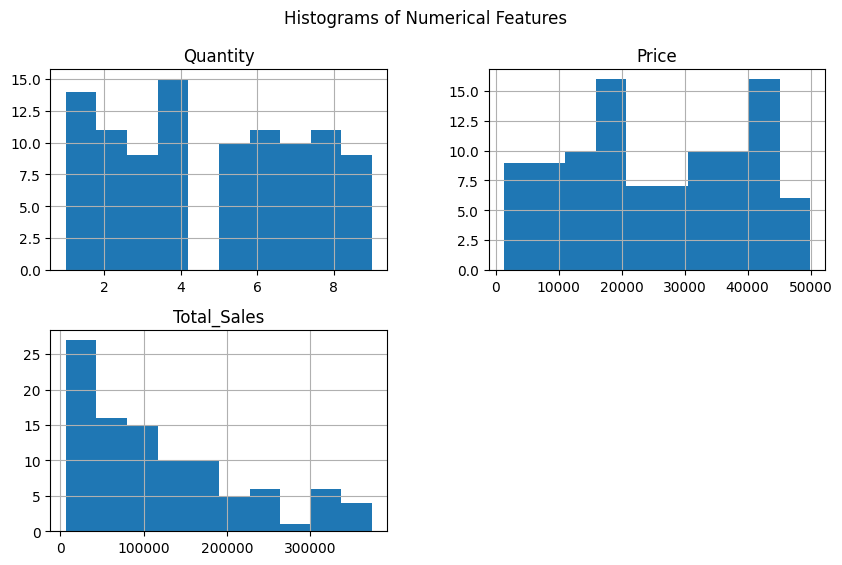

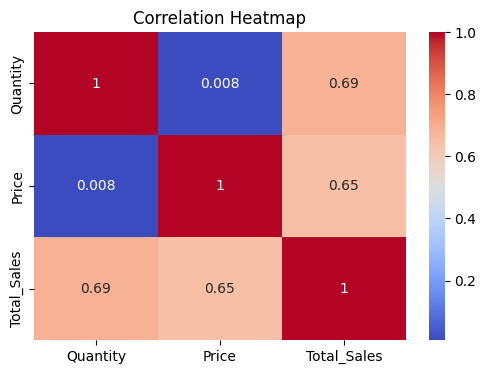


Hypothesis Test Results:
('One Sample T-Test (Sales Mean)', np.float64(0.0), np.float64(1.0))
('Two Sample T-Test', np.float64(-18.540318362868547), np.float64(5.703833032141566e-34))
('ANOVA Test', np.float64(124.81558718468538), np.float64(4.536437549820461e-40))

95% Confidence Interval for Quantity: (np.float64(4.266452381357786), np.float64(5.293547618642214))

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     194.9
Date:                Wed, 14 Jan 2026   Prob (F-statistic):           1.06e-34
Time:                        10:44:57   Log-Likelihood:                -155.83
No. Observations:                 100   AIC:                             317.7
Df Residuals:                      97   BIC:             

In [1]:
# ===============================
# Week 7: Statistical Business Analysis
# Google Colab Notebook
# ===============================

# 1. Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

# 2. Load Datasets (Uploaded to Colab)
sales_df = pd.read_csv("/content/sales_data.csv")
churn_df = pd.read_csv("/content/customer_churn.csv")

print("Sales Data Shape:", sales_df.shape)
print("Churn Data Shape:", churn_df.shape)

# 3. Descriptive Statistics
print("\n--- Descriptive Statistics ---")
desc_stats = sales_df.describe()
display(desc_stats)

# 4. Data Distribution Analysis
numeric_cols = sales_df.select_dtypes(include=np.number).columns

sales_df[numeric_cols].hist(figsize=(10, 6))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# 5. Correlation Analysis
correlation_matrix = sales_df[numeric_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 6. Hypothesis Testing
results = []

# One-sample t-test (Sales mean)
sales_col = numeric_cols[0]
t_stat, p_val = stats.ttest_1samp(sales_df[sales_col], sales_df[sales_col].mean())
results.append(("One Sample T-Test (Sales Mean)", t_stat, p_val))

# Two-sample t-test (if >=2 numeric columns)
if len(numeric_cols) >= 2:
    t2, p2 = stats.ttest_ind(
        sales_df[numeric_cols[0]],
        sales_df[numeric_cols[1]],
        equal_var=False
    )
    results.append(("Two Sample T-Test", t2, p2))

# ANOVA (if >=3 numeric columns)
if len(numeric_cols) >= 3:
    f_stat, p3 = stats.f_oneway(
        sales_df[numeric_cols[0]],
        sales_df[numeric_cols[1]],
        sales_df[numeric_cols[2]]
    )
    results.append(("ANOVA Test", f_stat, p3))

# Save hypothesis test results
with open("hypothesis_tests_results.txt", "w") as f:
    for name, stat, p in results:
        f.write(f"{name}: Statistic={stat:.4f}, p-value={p:.4g}\n")

print("\nHypothesis Test Results:")
for r in results:
    print(r)

# 7. Confidence Interval (95%)
mean_val = sales_df[sales_col].mean()
sem_val = stats.sem(sales_df[sales_col])
ci = stats.t.interval(0.95, len(sales_df[sales_col]) - 1, mean_val, sem_val)

print(f"\n95% Confidence Interval for {sales_col}: {ci}")

# 8. Regression Analysis
X = sales_df[numeric_cols].drop(columns=[sales_col], errors="ignore")
y = sales_df[sales_col]

if not X.empty:
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    print("\nRegression Summary:")
    print(model.summary())
